# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## 0: Load The Data

In [1]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split
import datetime


# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


---

## 1: Dataset Summary & Exploration

### 1.1. Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

df_csv = pd.read_csv('signnames.csv')

assert(len(X_train)==len(y_train))
assert(len(X_valid)==len(y_valid))
assert(len(X_test)==len(y_test))

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes, n_classes_count_tr = np.unique(y_train, return_counts=True)

_, n_classes_count_te = np.unique(y_test, return_counts=True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", len(n_classes))

print('class count in Training Set = ', n_classes_count_tr)
print('class count in Testing Set = ', n_classes_count_te)
print('class count in Test/Train ratio = ', n_classes_count_te/n_classes_count_tr)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
class count in Training Set =  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
class count in Testing Set =  [ 60 720 750 450 660 630 150 450 450 480 660 420 690 720 270 210 150 360
 390  60  90  90 120 150  90 480 180  60 150  90 150 270  60 210 120 390
 120  60 690  90  90  60  90]
class count in Test/Train ratio =  [ 0.33333333  0.36363636  0.37313433  0.35714286  0.37288136  0.38181818
  0.41666667  0.34883721  0.35714286  0.36363636  0.36666667  0.35897436
  0.36507937  0.375       0.39130435  0.38888889  0.41666667  0.36363636
  0.36111111  0.33333333  0.3         0.33333333  0.36363636  0.33333333
  0.375       0.35555556  0.33333333  0.28571429  0.3125      0.375
  0.38461538  0.39130435

### 1.2 Exploratory visualization of the dataset
Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

Sample training images


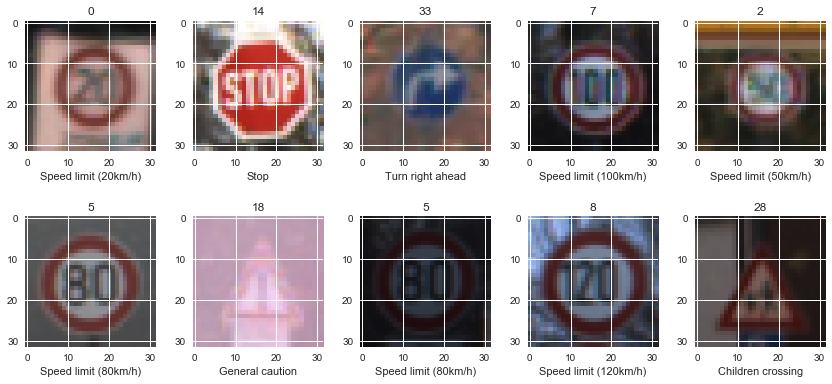

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

print('Sample training images')
# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize = (15,6))
fig.subplots_adjust(hspace = 0.5, wspace=.001)
axs = axs.ravel()
for i in range(10):
    idx = random.randint(0, len(X_train))
    image = X_train[idx]
    axs[i].set_xlabel("{}".format(df_csv.SignName[y_train[idx]]))
    axs[i].imshow(image)
    axs[i].set_title(y_train[idx])
    #axs[i].axis('off')

/Users/enterprise/anaconda/envs/car/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


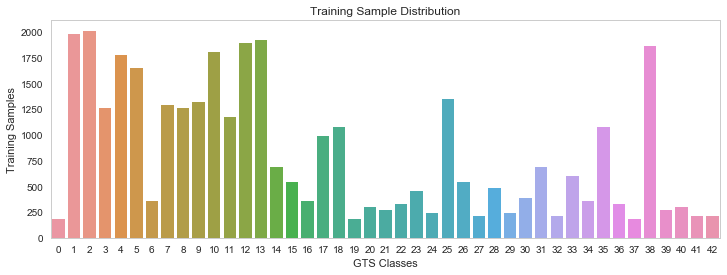

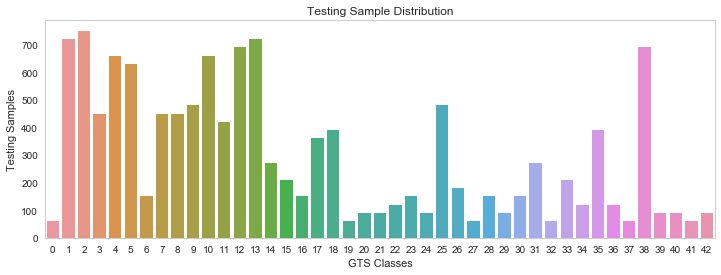

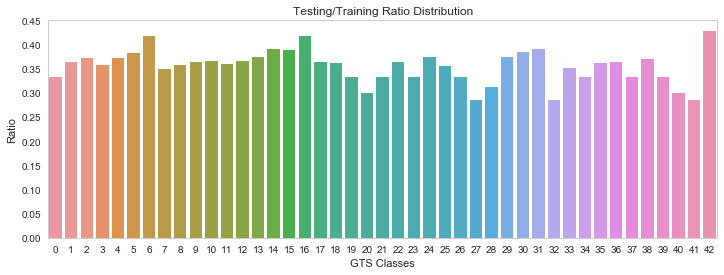

In [4]:
# Histogram of traffic sign classes

def histplot(bins, counts, xl = "Bins", yl = "counts", tl = "title"):
    sb.set_style("whitegrid", {'axes.grid' : False})
    fig, ax = plt.subplots(figsize = (12,4))
    sb.barplot(bins, counts)
    ax.set(xlabel = xl, ylabel = yl, title = tl)
    return(fig)

histplot(n_classes,n_classes_count_tr, xl = "GTS Classes",yl ="Training Samples",tl = "Training Sample Distribution").show()
histplot(n_classes,n_classes_count_te, xl = "GTS Classes",yl ="Testing Samples",tl = "Testing Sample Distribution").show()
histplot(n_classes,n_classes_count_te/n_classes_count_tr, xl = "GTS Classes",yl ="Ratio",tl = "Testing/Training Ratio Distribution").show()


----

## 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### 2.1 Pre-process the Data Set 

    - sharpening
    - linear contrast increase
    - histogram equalization

Sample of Pre-Processed Images


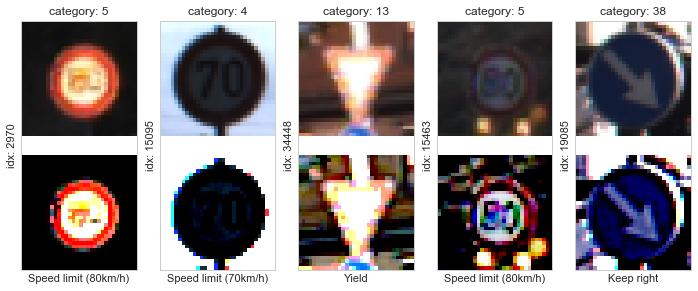

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

def eq_Hist(img):
    #Histogram Equalization
    imgE=img.copy() 
    imgE[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    imgE[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    imgE[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return(imgE)

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def norm_img(img):
    # normalized RGB image to aid learning
    #converting RGB (0 to 255) to (-1 to +1)
    img_norm = (img.astype('float32')-128.)/255.
    return(img_norm)

#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def img_preprocess(img):
    imgp = sharpen_img(img)
    imgp = contr_img(imgp,1.5)
    return(eq_Hist(imgp))

def batch_img_preprocess(batch_x, batch_y):
    batch_x_norm = np.zeros_like(batch_x, dtype = 'float32')
    for i,img in enumerate(batch_x):
        batch_x_norm[i,:,:,:] = img_preprocess(img)
        
    return(batch_x_norm,batch_y)


def test_img_preprocess(): 
    plt.figure(figsize = (12,10))
    for i in range(5):
        idx = random.randint(0, len(X_train))
        img = X_train[idx].squeeze() #explicit array conversion
        img_proc = img_preprocess(img)
        div = 255*np.ones((5,32,3),dtype="uint8")
        
        plt.subplot(1,5,i+1)
        fin_img = np.vstack([img, div, img_proc])
        plt.imshow(fin_img)
        
        plt.title("category: {}".format(y_train[idx]))
        plt.xlabel("{}".format(df_csv.SignName[y_train[idx]]))
        plt.ylabel("idx: {}".format(idx))
        plt.tick_params(labelbottom='off', labelleft='off')
    return()

print("Sample of Pre-Processed Images")
test_img_preprocess()

X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = batch_img_preprocess(X_train, y_train)

### 2.2 Data Augmentation (Todo)


In [10]:
### https://stackoverflow.com/questions/30003068/get-a-list-of-all-indices-of-repeated-elements-in-a-numpy-array

import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg


def rotate_img(img, ang_range):
    # rotation
    img_h, img_w, img_ch = img.shape
    rot = np.random.uniform(ang_range)-ang_range/2  
    rotM = cv2.getRotationMatrix2D((img_w/2,img_h/2),rot,1)
    return(cv2.warpAffine(img,rotM,(img_w,img_h)))
    
def translate_img(img, trans_range):
    # translation
    img_h, img_w, img_ch = img.shape
    tr_x, tr_y = trans_range*np.random.uniform(size=(2,1))-trans_range/2
    transM = np.float32([[1,0,tr_x],[0,1,tr_y]])
    return(cv2.warpAffine(img,transM,(img_w,img_h)))

def sheer_img(img,shear_range):
    # shear
    img_h, img_w, img_ch = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1  = 5+shear_range*np.random.uniform()-shear_range/2
    pt2  = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shearM = cv2.getAffineTransform(pts1,pts2)
    return(cv2.warpAffine(img,shearM,(img_w,img_h)))


def transform_image(img, ang_range=15,shear_range=8,trans_range=4):
    img_warp = np.copy(img)
    img_warp = rotate_img(img, ang_range)
    img_warp = translate_img(img_warp, trans_range)
    img_warp = sheer_img(img_warp,shear_range)
    return(img_warp.reshape(-1, *img_warp.shape))


def test_imgtransform():
    idx = np.random.randint(0, len(X_train))
    image = X_train[idx].squeeze() #explicit array conversion

    gs1 = gridspec.GridSpec(10, 2)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
    plt.figure(figsize=(12,6))
    for i in range(20):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        img = transform_image(image,20,10,5)

        plt.subplot(10,10,i+1)
        plt.imshow(img)
        plt.axis('off')

    #plt.show()
    return(plt)

#test_imgtransform().show()

def augmentData(X_data, y_data, multiplier=2):

    X_data_augs = [X_data]
    y_data_augs = [y_data]
    
    vals, inverse, counts = np.unique(y_data, return_inverse=True, return_counts=True)
    rows, cols            = np.where (inverse == vals[:, np.newaxis])
    _   , inverse_rows    = np.unique(rows, return_index=True)
    class_indices_list =  np.split(cols, inverse_rows[1:])
    
    class_labels, class_counts = np.unique(y_data, return_counts=True)
    
    n_target = np.int(multiplier*np.max(class_counts))
    n_augs = [n_target - class_count for class_count in class_counts]
    
    print("Target num of samples for each class: {}".format(n_target))
    print("Total num of training samples with Data Augmentation: {}\n".format(n_target*len(class_labels)))
    for class_label, n_aug, class_indices_data in zip(class_labels, n_augs, class_indices_list):    
        
        #print("Augmenting class: {:2} with {:4} samples".format(class_label, n_aug))
        for idx, class_idx in enumerate(np.random.choice(class_indices_data, size=n_aug)):
            
            X_data_augs.append(transform_image(X_data[class_idx]))
            y_data_augs.append(y_data[class_idx])
    
    return(np.vstack(X_data_augs), np.hstack(y_data_augs))


# training dataset augmentation
X_data_aug, y_data_aug                      = augmentData(X_train, y_train)
X_train, X_val_std, y_train, y_val_std  = train_test_split(X_data_aug, y_data_aug, test_size=0.15)
print("Data Augmentation Complete...")


Target num of samples for each class: 4020
Total num of training samples with Data Augmentation: 172860

Data Augmentation Complete...


/Users/enterprise/anaconda/envs/car/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


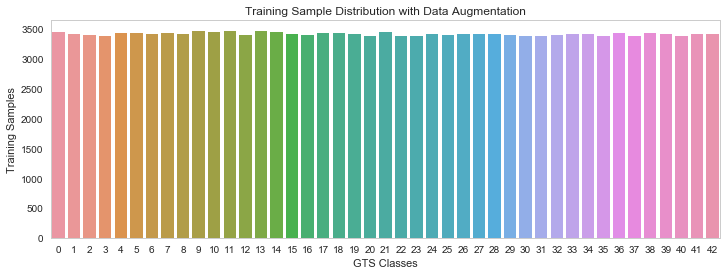

In [11]:
n_classes, n_classes_count_tr = np.unique(y_train, return_counts=True)
histplot(n_classes,n_classes_count_tr, xl = "GTS Classes",yl ="Training Samples",tl = "Training Sample Distribution with Data Augmentation").show()

### 2.3 Model Architecture

In [12]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

tf.reset_default_graph()
keep_prob = tf.placeholder(tf.float32) # probability to keep units

### Methods for differen types of layers
def conv_layer(X, kernel_size, size_in, size_out, name="conv"):
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([kernel_size, kernel_size, size_in, size_out],mean=0 , stddev=0.1), name="W")
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
        conv = tf.nn.conv2d(X, w, strides=[1, 1, 1, 1], padding="VALID")
        act = tf.nn.relu(conv + b)
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        tf.summary.histogram("activations", act)
        return(act)
    
def lrn_layer(X, name ="lrn"):
    with tf.name_scope(name):
        return(tf.nn.local_response_normalization(X, alpha=1e-4,beta=0.75, depth_radius=2, bias=2.0))
    
def maxpool2x2_layer(X, name="maxpool"):
    with tf.name_scope(name):
        return(tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID"))


def fc_layer(X, size_in, size_out, name="fc", relu = 1):
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([size_in, size_out],mean=0 , stddev=0.1), name="W")
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
        act = tf.matmul(X, w) + b
        if (relu):
            act = tf.nn.relu(act)
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        tf.summary.histogram("activations", act)
        return act

def DO_layer(X, prob = keep_prob, name ="DropOut"):
    with tf.name_scope(name):
        return(tf.nn.dropout(X, prob))

#### 2.3.1 Architecture Description
A resized LeNet architecture was used as the base for the architecture for the traffic sign classifier project. 

Convolutional 2D layers (CONV), are the layers that perform the convolution with a given set of filters. Each one of the CONV layers we use is followed by a ReLu nonlinearity.

Maximum pooling 2D layers (MAXPOOL), that allow to subsample the input
data. These are actually the only layers that we use to reduce the input
feature size. Halving the data at layer 4 and 7 is essential for convergence and to contain the training time.

Normalization layers (NORM). The normalization where the summation is computed over this position up to 5 neighboring channels.

Dropout layers (DOL), that iteratively inhibit random weights. Dropout is
only used during training (not testing).

    - Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. Relu Activation.
    - LRN 1: Local response normalization
    - Pooling. Input = 28x28x6. Output = 14x14x6.
    - Layer 2: Convolutional. Output = 10x10x16. Relu Activation.
    - LRN 2: Local response normalization
    - Pooling. Input = 10x10x16. Output = 5x5x16.
    - Flatten. Input = 5x5x16. Output = 400.
    - Layer 3: Fully Connected. Input = 400. Output = 120. Activation
    - Layer 4: Dropout layer
    - Layer 5: Fully Connected. Input = 120. Output = 84. Activation.
    - Layer 6: Dropout layer
    - Layer 7: Fully Connected. Input = 84. Output = 43.

In [13]:
def LeNetLRNDOL(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6
    # weight shape = patch width x pathc height x input feature depth x fiter size
    # bias shape is same as filter output size
    # 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b

    # TODO: Activation.
    # relu activation function
    conv1 = tf.nn.relu(conv1)
    
    # Local Response Normalization
    #conv1 = tf.nn.local_response_normalization(conv1, alpha=1e-4,beta=0.75, depth_radius=2, bias=2.0)


    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_W, strides = [1,1,1,1], padding = 'VALID') + conv2_b


    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Local Response Normalization
    #conv2 = tf.nn.local_response_normalization(conv2, alpha=1e-4,beta=0.75, depth_radius=2, bias=2.0)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    f0 = flatten(conv2)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    f1_w = tf.Variable(tf.truncated_normal(shape =(400,120), mean = mu, stddev = sigma))
    f1_b = tf.Variable(tf.zeros(120))
    f1 = tf.matmul(f0,f1_w) + f1_b  

    # TODO: Activation.
    f1 = tf.nn.relu(f1)

    # ADDITION: Drouput
    #keep_prob = tf.placeholder(tf.float32) # probability to keep units
    f1 = tf.nn.dropout(f1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    f2_w  = tf.Variable(tf.truncated_normal(shape =(120,84), mean = mu, stddev = sigma))
    f2_b = tf.Variable(tf.zeros(84))
    f2 = tf.matmul(f1, f2_w) + f2_b


    # TODO: Activation.
    f2 = tf.nn.relu(f2)

    # ADDITION: Drouput
    f2 = tf.nn.dropout(f2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    f3_w = tf.Variable(tf.truncated_normal(shape =(84,43), mean = mu, stddev = sigma))
    f3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(f2, f3_w) + f3_b

    return(logits)

In [14]:
def GTSRB(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x32
    # weight shape = patch width x pathc height x input feature depth x fiter size
    # bias shape is same as filter output size
    # 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Local Response Normalization
    norm1 = tf.nn.local_response_normalization(conv1, alpha=1e-4,beta=0.75, depth_radius=2, bias=2.0)

    # Layer 3: Convolutional. Input 32x32x32. Output = 32x32x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (3,3,32,64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(norm1,conv2_W, strides = [1,1,1,1], padding = 'SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    # Layer 4: Pooling. Input = 32x32x64. Output = 16x16x64.
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

    # Layer 5: Local Response Normalization
    norm2 = tf.nn.local_response_normalization(conv2, alpha=1e-4,beta=0.75, depth_radius=2, bias=2.0)
    
    # Layer 6: Convolutional.Input = 16x16x64 Output = 16x16x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape = (3,3,64,128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(norm2,conv3_W, strides = [1,1,1,1], padding = 'SAME') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Layer 7: Convolutional.Input = 16x16x128 Output = 16x16x256.
    conv4_W = tf.Variable(tf.truncated_normal(shape = (3,3,128,256), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(256))
    conv4 = tf.nn.conv2d(conv3,conv4_W, strides = [1,1,1,1], padding = 'SAME') + conv4_b
    conv4 = tf.nn.relu(conv4)
    
    # Layer 8: Pooling. Input = 16x16x256. Output = 8x8x256.
    conv4 = tf.nn.max_pool(conv4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    # Layer 9: Local Response Normalization
    norm3 = tf.nn.local_response_normalization(conv4, alpha=1e-4,beta=0.75, depth_radius=2, bias=2.0)

    
    # Flatten. Input = 8x8x256. Output = 16384.
    f0 = flatten(norm3)
    
    # Layer 10: Drouput
    f0 = tf.nn.dropout(f0, keep_prob)
    
    # Layer 11: Fully Connected. Input = 16384. Output = 256.
    f1_w = tf.Variable(tf.truncated_normal(shape =(16384,256), mean = mu, stddev = sigma))
    f1_b = tf.Variable(tf.zeros(256))
    f1 = tf.matmul(f0,f1_w) + f1_b  
    f1 = tf.nn.relu(f1)

    # ADDITION: Drouput
    f1 = tf.nn.dropout(f1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 256. Output = 43.
    f2_w  = tf.Variable(tf.truncated_normal(shape =(256,43), mean = mu, stddev = sigma))
    f2_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(f1, f2_w) + f2_b

    return(logits)

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="x")
y = tf.placeholder(tf.int32, (None), name="labels")
one_hot_y = tf.one_hot(y, 43)


LRN = True
DOL = True

logits = LeNetLRNDOL(x)
#logits = GTSRB(x)

### Training Pipeline

In [16]:
# Convert logits to label indexes (int).
# Shape [None], which is a 1D vector of length == batch_size.

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%Hh%Mm%Ss")
LOGDIR = "./log/summary/"


# Training Parameters
EPOCHS = 10
BATCH_SIZE = 128

rate = 1e-4
rate_decay = 0.8
momentum = 0.9
dropout_p = 0.5
top_K = 5


with tf.name_scope("predictlabels"):
    predicted_labels = tf.argmax(logits, 1)
    gt_labels = tf.argmax(one_hot_y, 1)
    preds_probs = tf.nn.softmax(logits)
    top_ks = tf.nn.top_k(preds_probs, k=top_K)

with tf.name_scope("Cross_entropy"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name ="xent")
    loss_operation = tf.reduce_mean(cross_entropy, name ="loss_op")
    tf.summary.scalar("Xent",loss_operation)


with tf.name_scope("train"):
    optimizer = tf.train.RMSPropOptimizer(learning_rate =rate, decay=rate_decay, momentum=momentum)
    training_operation = optimizer.minimize(loss_operation)


with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy", accuracy_operation)
    
summ = tf.summary.merge_all()

saver = tf.train.Saver()

### Model Evaluation

In [17]:
def evaluate(X_data, y_data, keep_prob, sess, DOL = 1):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        if(DOL): # if the model contains the dropout layer
            feed_dict = {x: batch_x, y: batch_y, keep_prob : 1}
        else:
            feed_dict={x: batch_x, y: batch_y}
        accuracy,loss = sess.run([accuracy_operation, loss_operation], feed_dict)
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss*len(batch_x))
    return (total_accuracy/num_examples,total_loss/num_examples)

In [18]:
## Train the Model

In [23]:
import time
import csv

start_time = time.time()
with tf.Session() as sess:
    with open('./train_log.csv', 'wt') as csvfile:
        csvwriter = csv.writer(csvfile,delimiter=',')
        csvwriter.writerow(['Epoch','step','train_loss','train_accuracy', 'validation_loss','validation_accuracy'])
        csvfile.flush()
        sess.run(tf.global_variables_initializer())
    
        writer = tf.summary.FileWriter(LOGDIR+timestamp)
        writer.add_graph(sess.graph)
        num_examples = len(X_train)
    
        val_accs = []
        val_losses = []
        train_accs = []
        train_losses = []
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            loss = 0
            accu = 0
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                _,train_loss,train_accuracy  = sess.run([training_operation,loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: dropout_p})
                accu += (train_accuracy * len(batch_x))
                loss += (train_loss*len(batch_x))
                if(offset%10240==0):
                    val_accuracy, val_loss = evaluate(X_valid, y_valid,keep_prob, sess)
                    csvwriter.writerow([i+1,offset,train_loss,train_accuracy,val_loss,val_accuracy])
                    csvfile.flush()
                    
            train_accs.append(accu/num_examples)
            train_losses.append(loss/num_examples)

            val_accuracy, val_loss = evaluate(X_valid, y_valid,keep_prob, sess)
            val_accs.append(val_accuracy)
            val_losses.append(val_loss)

            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy  = {:.3f} Training Loss = {:.6f} Validation Accuracy = {:.3f} Validation Loss = {:.6f}".format(train_accuracy, train_loss, val_accuracy,val_loss))
            print()
        
    saver.save(sess, LOGDIR + timestamp +'/lenetLRNDOL')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy  = 0.113 Training Loss = 3.431695 Validation Accuracy = 0.007 Validation Loss = 3.925596

EPOCH 2 ...
Training Accuracy  = 0.252 Training Loss = 2.733974 Validation Accuracy = 0.071 Validation Loss = 3.447959

EPOCH 3 ...
Training Accuracy  = 0.278 Training Loss = 2.334268 Validation Accuracy = 0.114 Validation Loss = 2.944730

EPOCH 4 ...
Training Accuracy  = 0.357 Training Loss = 2.164505 Validation Accuracy = 0.184 Validation Loss = 2.701520

EPOCH 5 ...
Training Accuracy  = 0.322 Training Loss = 1.977484 Validation Accuracy = 0.100 Validation Loss = 3.360274

EPOCH 6 ...
Training Accuracy  = 0.487 Training Loss = 1.846039 Validation Accuracy = 0.136 Validation Loss = 3.145667

EPOCH 7 ...
Training Accuracy  = 0.435 Training Loss = 1.950673 Validation Accuracy = 0.175 Validation Loss = 2.832799

EPOCH 8 ...
Training Accuracy  = 0.383 Training Loss = 2.252655 Validation Accuracy = 0.192 Validation Loss = 2.732147

EPOCH 9 ...
Training Accura

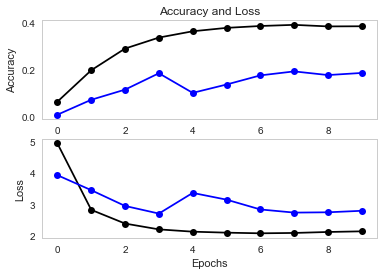

In [24]:
#plottig the accuracy and loss over epocks

plt.subplot(2, 1, 1)
plt.plot(range(EPOCHS), train_accs, 'ko-',range(EPOCHS),val_accs,'bo-')
plt.title('Accuracy and Loss')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(EPOCHS), train_losses, 'ko-',range(EPOCHS),val_losses,'bo-')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [ ]:
# load test results
'''
#Prepare testing dataset
X_test_prep=[]
for i in range(n_test):
    img=X_test[i]
    X_test_prep.append(transform_img(img))
'''

#Run testing
with tf.Session() as sess:
    saver.restore(sess, './my_net_f.ckpt')
    test_accuracy = evaluate(X_test, y_test, sess)
    print("Test Accuracy = {:.3f}".format(test_accuracy))